In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:

df = pd.read_excel('BCI backup.xlsx', sheet_name='Dummy leads')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Lead_ID                      20 non-null     object
 1   Booking_ID                   20 non-null     object
 2   Customer name                20 non-null     object
 3   Lead_Source                  20 non-null     object
 4   First_Time_Buyer             20 non-null     object
 5   Age                          20 non-null     int64 
 6   Gender                       20 non-null     object
 7   Location                     20 non-null     object
 8   Income                       20 non-null     int64 
 9   OEM_Loyalty_Program          20 non-null     object
 10  Finances_Status              20 non-null     object
 11  CIBIL_Score                  20 non-null     int64 
 12  Down_Payment                 20 non-null     int64 
 13  Undecided_Finances           20 non-n

In [3]:
df = df.fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Lead_ID                      20 non-null     object
 1   Booking_ID                   20 non-null     object
 2   Customer name                20 non-null     object
 3   Lead_Source                  20 non-null     object
 4   First_Time_Buyer             20 non-null     object
 5   Age                          20 non-null     int64 
 6   Gender                       20 non-null     object
 7   Location                     20 non-null     object
 8   Income                       20 non-null     int64 
 9   OEM_Loyalty_Program          20 non-null     object
 10  Finances_Status              20 non-null     object
 11  CIBIL_Score                  20 non-null     int64 
 12  Down_Payment                 20 non-null     int64 
 13  Undecided_Finances           20 non-n

In [4]:
df.describe()

,Age,Income,CIBIL_Score,Down_Payment,Customer_Satisfaction_Score
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000
mean,35.100000,1.297500e+06,752.500000,273000.000000,7.700000
std,6.881707,4.021243e+05,60.686858,183420.712829,1.380313
min,25.000000,7.500000e+05,650.000000,50000.000000,5.000000
25%,29.000000,9.500000e+05,707.500000,150000.000000,7.000000
50%,34.500000,1.300000e+06,755.000000,200000.000000,8.000000
75%,39.250000,1.550000e+06,800.000000,325000.000000,9.000000
max,50.000000,2.000000e+06,850.000000,700000.000000,9.000000


In [ ]:
from rules import bci_rules, evaluate_condition

def addTargetValue(row):
    counts = 0
    for i in range(len(bci_rules)):
        if evaluate_condition(row[bci_rules[i]['value']], bci_rules[i]["condition"]):
            counts += 1
    if counts >= 10:
        return 1
    return 0

df['bciindex'] = df.apply(lambda row: addTargetValue(row), axis=1)
print(df['bciindex'].value_counts())
print(df['bciindex'].head())

bciindex
0    15
1     5
Name: count, dtype: int64
0    1
1    0
2    0
3    0
4    0
Name: bciindex, dtype: int64


In [6]:
def checkRows(row):
    row['Booking_Lead_Time'] = int(row['Booking_Lead_Time'].replace(' days', ''))
    row['Add_Ons'] = row['Add_Ons'].replace(' ', '').split(';')
    row['OEM_Loyalty_Program'] = 1 if row['OEM_Loyalty_Program'] == 'Yes' else 0
    return row
df['isMale'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Lead_Source'] = df['Lead_Source'].map({ 'Referral': 2 , 'Online': 1, 'Walk-in': 0})
df['Needs_Match'] = df['Needs_Match'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Dealership_Engagement'] = df['Dealership_Engagement'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Competitive_Factors'] = df['Competitive_Factors'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['External_Factors'] = df['External_Factors'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Cancellation_Probability'] = df['Cancellation_Probability'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Preferred_Delivery_Time'] = df['Preferred_Delivery_Time'].map({ 'Evening': 2 , 'Afternoon': 1, 'Morning': 0})
df['isStockAvailable'] = df['Stock_Status'].map({'Available': 1, 'Unavailable': 0})
df['isOnDeliveryDate'] = df['Delivery_Date_Status'].map({'On-Time': 1, 'Delayed': 0})
df['isUndecidedFinances'] = df['Undecided_Finances'].map({'Yes': 1, 'No': 0})
df['isFirstTimeBuyer'] = df['First_Time_Buyer'].map({'Yes': 1, 'No': 0})
df['Test_Drive_Status'] = df['Test_Drive_Status'].map({'Completed': 1, 'Not Taken': 0})
df['Experience_With_Sales_Rep'] = df['Experience_With_Sales_Rep'].map({ 'Positive': 1 , 'Neutral': 0, 'Negative': -1})
df['Companion_Feedback'] = df['Companion_Feedback'].map({ 'Positive': 1 , 'Neutral': 0, 'Negative': -1})
df['Special_Occasions'] = df['Special_Occasions'].map({ 'Wedding': 2 , 'Festival': 1, 'None': 0})
df = df.apply(checkRows, axis=1)
print(df['Add_Ons'].head())
print(df.describe())

0    [ExtendedWarranty, FloorMats]
1            [UpgradedSoundSystem]
2                           [None]
3               [ExtendedWarranty]
4                           [None]
Name: Add_Ons, dtype: object
       Lead_Source        Age        Income  OEM_Loyalty_Program  CIBIL_Score  \
count    20.000000  20.000000  2.000000e+01            20.000000    20.000000   
mean      1.000000  35.100000  1.297500e+06             0.500000   752.500000   
std       0.794719   6.881707  4.021243e+05             0.512989    60.686858   
min       0.000000  25.000000  7.500000e+05             0.000000   650.000000   
25%       0.000000  29.000000  9.500000e+05             0.000000   707.500000   
50%       1.000000  34.500000  1.300000e+06             0.500000   755.000000   
75%       2.000000  39.250000  1.550000e+06             1.000000   800.000000   
max       2.000000  50.000000  2.000000e+06             1.000000   850.000000   

        Down_Payment  Special_Occasions  Booking_Lead_Time  Needs_

array([[<Axes: title={'center': 'Lead_Source'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'OEM_Loyalty_Program'}>,
        <Axes: title={'center': 'CIBIL_Score'}>],
       [<Axes: title={'center': 'Down_Payment'}>,
        <Axes: title={'center': 'Special_Occasions'}>,
        <Axes: title={'center': 'Booking_Lead_Time'}>,
        <Axes: title={'center': 'Needs_Match'}>,
        <Axes: title={'center': 'Dealership_Engagement'}>],
       [<Axes: title={'center': 'Experience_With_Sales_Rep'}>,
        <Axes: title={'center': 'Companion_Feedback'}>,
        <Axes: title={'center': 'Competitive_Factors'}>,
        <Axes: title={'center': 'External_Factors'}>,
        <Axes: title={'center': 'Customer_Satisfaction_Score'}>],
       [<Axes: title={'center': 'Cancellation_Probability'}>,
        <Axes: title={'center': 'Test_Drive_Status'}>,
        <Axes: title={'center': 'Preferred_Delivery_Time'}>,
        <Axes: t

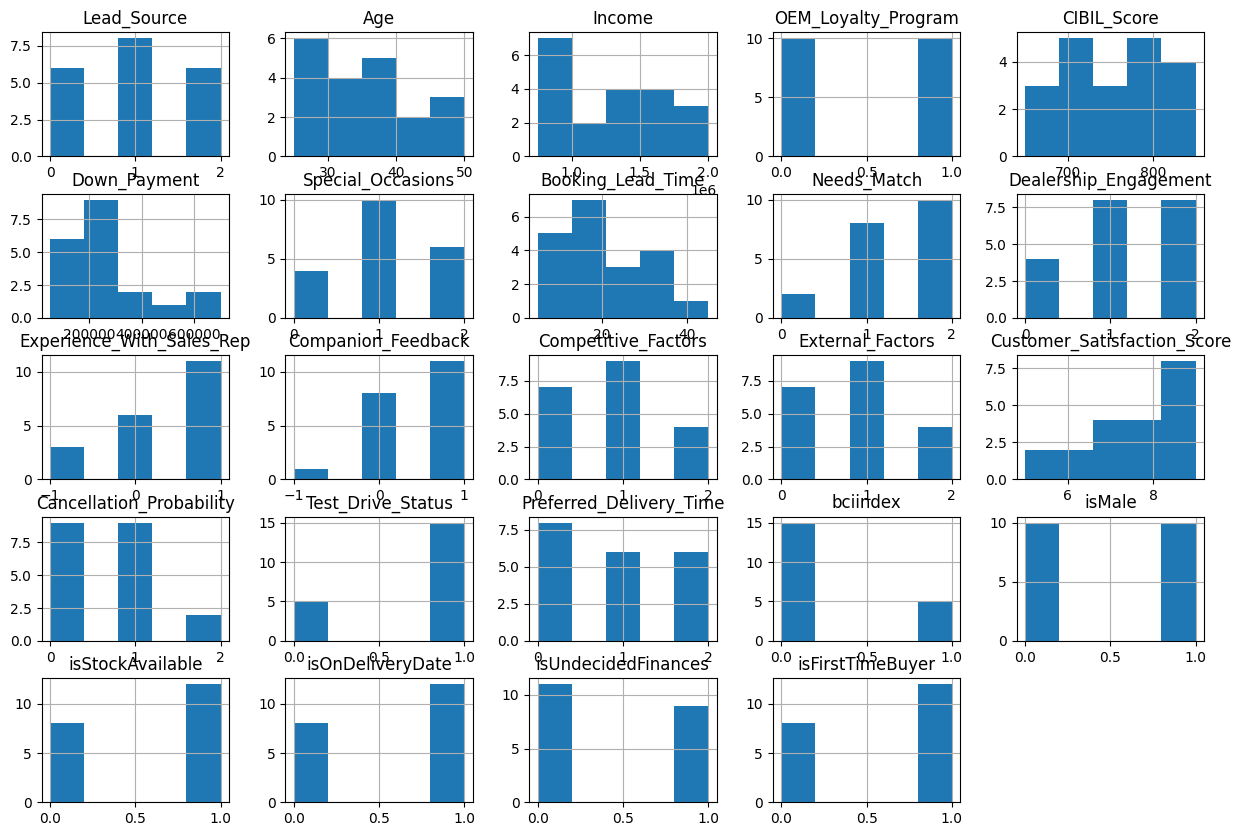

In [7]:
df.hist(bins=5, figsize=(15,10))

In [8]:
# import seaborn as sns
# df_filtered = df.select_dtypes(include=['int64', 'float64'])
# sns.pairplot(df_filtered)

In [9]:


first_time_buyers = df[df['First_Time_Buyer'] == 'Yes']['Customer_Satisfaction_Score']
repeat_customers = df[df['First_Time_Buyer'] == 'No']['Customer_Satisfaction_Score']

t_statistic, p_value = stats.ttest_ind(first_time_buyers, repeat_customers)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 0.51880524140054, P-value: 0.6102163399683445


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
models_encoded = mlb.fit_transform(df['Add_Ons'])
models_encoded_df = pd.DataFrame(models_encoded, columns=mlb.classes_)
df = df.join(models_encoded_df)
df = df.drop(['Lead_ID', 'Booking_ID', 'Customer name', 'Add_Ons', 'Gender', 'Stock_Status', 'Delivery_Date_Status', 'Undecided_Finances', 'First_Time_Buyer', 'Location'], axis=1)
df.head()

,Lead_Source,Age,Income,OEM_Loyalty_Program,Finances_Status,CIBIL_Score,Down_Payment,Special_Occasions,Booking_Lead_Time,Needs_Match,...,bciindex,isMale,isStockAvailable,isOnDeliveryDate,isUndecidedFinances,isFirstTimeBuyer,ExtendedWarranty,FloorMats,None,UpgradedSoundSystem
0,1,28,1200000,1,Approved Loans,750,200000,1,15,2,...,1,1,1,1,0,1,1,1,0,0
1,0,35,1800000,0,Cash Purchase,800,500000,2,30,1,...,0,0,0,0,0,0,0,0,0,1
2,2,45,1500000,1,Pending Loans,700,150000,0,10,0,...,0,1,1,1,1,1,0,0,1,0
3,1,32,800000,0,Undecided,670,100000,1,7,1,...,0,0,0,0,1,1,1,0,0,0
4,0,50,2000000,1,Cash Purchase,850,700000,0,45,2,...,0,1,1,1,0,0,0,0,1,0


In [11]:
df_filtered = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
df_filtered.columns

Index(['Finances_Status', 'Vehicle_Type'], dtype='object')

In [12]:
from sklearn.preprocessing import OneHotEncoder
prusage_encoder = OneHotEncoder(sparse_output=False)
hot_encoded_data = prusage_encoder.fit_transform(df[df_filtered.columns])
one_hot_df = pd.DataFrame(hot_encoded_data, columns=prusage_encoder.get_feature_names_out(df_filtered.columns))
df = df.drop(df_filtered.columns, axis=1)
df = df.join(one_hot_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Lead_Source                     20 non-null     int64  
 1   Age                             20 non-null     int64  
 2   Income                          20 non-null     int64  
 3   OEM_Loyalty_Program             20 non-null     int64  
 4   CIBIL_Score                     20 non-null     int64  
 5   Down_Payment                    20 non-null     int64  
 6   Special_Occasions               20 non-null     int64  
 7   Booking_Lead_Time               20 non-null     int64  
 8   Needs_Match                     20 non-null     int64  
 9   Dealership_Engagement           20 non-null     int64  
 10  Experience_With_Sales_Rep       20 non-null     int64  
 11  Companion_Feedback              20 non-null     int64  
 12  Competitive_Factors             20 non

In [13]:
pd.set_option('display.max_columns', None)
df.head()

,Lead_Source,Age,Income,OEM_Loyalty_Program,CIBIL_Score,Down_Payment,Special_Occasions,Booking_Lead_Time,Needs_Match,Dealership_Engagement,Experience_With_Sales_Rep,Companion_Feedback,Competitive_Factors,External_Factors,Customer_Satisfaction_Score,Cancellation_Probability,Test_Drive_Status,Preferred_Delivery_Time,bciindex,isMale,isStockAvailable,isOnDeliveryDate,isUndecidedFinances,isFirstTimeBuyer,ExtendedWarranty,FloorMats,None,UpgradedSoundSystem,Finances_Status_Approved Loans,Finances_Status_Cash Purchase,Finances_Status_Pending Loans,Finances_Status_Undecided,Vehicle_Type_Hatchback,Vehicle_Type_SUV,Vehicle_Type_Sedan
0,1,28,1200000,1,750,200000,1,15,2,2,1,1,0,0,9,0,1,0,1,1,1,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,35,1800000,0,800,500000,2,30,1,1,0,0,1,1,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,45,1500000,1,700,150000,0,10,0,0,-1,-1,2,2,5,2,1,2,0,1,1,1,1,1,0,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,32,800000,0,670,100000,1,7,1,2,1,0,1,0,8,1,1,0,0,0,0,0,1,1,1,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,50,2000000,1,850,700000,0,45,2,1,1,1,0,0,9,0,0,1,0,1,1,1,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df.to_csv('BCIchanges.csv', index=False)
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

corr_features = correlation(df, 0.8)
print(corr_features)

{'Down_Payment', 'Experience_With_Sales_Rep', 'isUndecidedFinances', 'Cancellation_Probability', 'Customer_Satisfaction_Score', 'Finances_Status_Cash Purchase'}


In [15]:
# After looking at correlation, dropping the columns
# df = df.drop(['Experience_With_Sales_Rep', 'Cancellation_Probability'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('bciindex', axis=1)
y = df['bciindex']
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=["Coefficient"])
intercept = model.intercept_
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

Coefficients:
                                 Coefficient
Lead_Source                        0.008086
Age                               -0.989811
Income                            -0.000029
OEM_Loyalty_Program                0.105466
CIBIL_Score                        0.069940
Down_Payment                       0.000113
Special_Occasions                  0.042665
Booking_Lead_Time                 -0.959714
Needs_Match                        0.088169
Dealership_Engagement              0.106726
Experience_With_Sales_Rep          0.094361
Companion_Feedback                 0.085030
Competitive_Factors               -0.120268
External_Factors                  -0.071401
Customer_Satisfaction_Score        0.088402
Cancellation_Probability          -0.086329
Test_Drive_Status                  0.042960
Preferred_Delivery_Time           -0.117087
isMale                            -0.001194
isStockAvailable                   0.007157
isOnDeliveryDate                   0.046904
isUndecidedFinanc

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
brierloss = brier_score_loss(y_test, y_prob)
classreport = classification_report(y_test, y_pred)

probs = [float(value) * 100 for value in y_prob]
print(f"Predicted Probabilities: {probs}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Brier Loss: {brierloss:.4f}")
print("Classification Report: ", classreport)

Predicted Probabilities: [74.5527272775629, 35.319955637100584, 85.32535030620335, 99.99999999999993, 0.0025466380648943563, 0.09363986283300335]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000
Log Loss: 0.1482
Brier Loss: 0.0352
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [19]:
# from sklearn.metrics import roc_curve

# fpr, tpr, _ = roc_curve(y_test,  y_prob)
# auc = roc_auc_score(y_test, y_prob)

# #create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.legend(loc=4)
# plt.show()

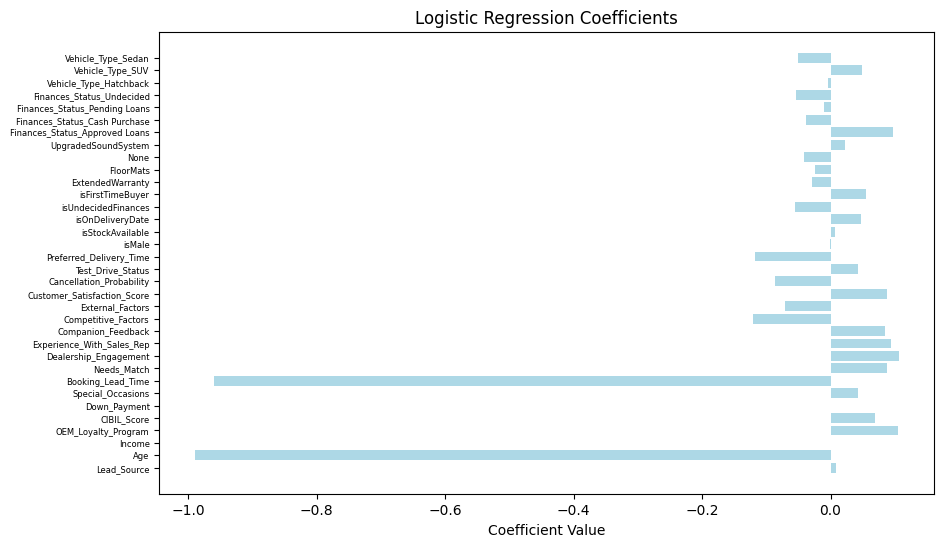

In [37]:
# import shap

# explainer = shap.LinearExplainer(model, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")
coefficients = model.coef_[0]

feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='lightblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.yticks(fontsize=6)
plt.show()

In [21]:
from sklearn.naive_bayes import BernoulliNB

bernaulliNB_model = BernoulliNB()
bernaulliNB_model.fit(X_train, y_train)
print(bernaulliNB_model.predict(X_test))

[1 0 1 0 0 0]


In [22]:
y_pred = bernaulliNB_model.predict(X_test)
y_prob = bernaulliNB_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
brierloss = brier_score_loss(y_test, y_prob)
classreport = classification_report(y_test, y_pred)

probs = [float(value) * 100 for value in y_prob]
print(f"Predicted Probabilities: {probs}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Brier Loss: {brierloss:.4f}")
print("Classification Report: ", classreport)

Predicted Probabilities: [99.99999353055017, 0.005484743293812816, 99.99997315489463, 40.62860428266474, 14.376428406711886, 0.004595258530164527]
Accuracy: 0.8333
Precision: 1.0000
Recall: 0.6667
F1 Score: 0.8000
AUC: 1.0000
Log Loss: 0.1760
Brier Loss: 0.0622
Classification Report:                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [29]:
neg_class_prob_sorted = bernaulliNB_model.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = bernaulliNB_model.feature_log_prob_[1, :].argsort()[::-1]

top_10_neg_class_features = neg_class_prob_sorted[:10]
top_10_pos_class_features = pos_class_prob_sorted[:10]

neg_class_feature_names = X_train.columns[top_10_neg_class_features]
pos_class_feature_names = X_train.columns[top_10_pos_class_features]

print("Top 10 Negative Class Features and their Log-Probabilities:")
for feature, log_prob in zip(neg_class_feature_names, bernaulliNB_model.feature_log_prob_[0, top_10_neg_class_features]):
    print(f"Feature: {feature}, Log-Probability: {log_prob}")

print("\nTop 10 Positive Class Features and their Log-Probabilities:")
for feature, log_prob in zip(pos_class_feature_names, bernaulliNB_model.feature_log_prob_[1, top_10_pos_class_features]):
    print(f"Feature: {feature}, Log-Probability: {log_prob}")

Top 10 Negative Class Features and their Log-Probabilities:
Feature: Down_Payment, Log-Probability: -0.07410797215372167
Feature: Age, Log-Probability: -0.07410797215372167
Feature: CIBIL_Score, Log-Probability: -0.07410797215372167
Feature: Customer_Satisfaction_Score, Log-Probability: -0.07410797215372167
Feature: Booking_Lead_Time, Log-Probability: -0.07410797215372167
Feature: Income, Log-Probability: -0.07410797215372167
Feature: Competitive_Factors, Log-Probability: -0.24116205681688774
Feature: Needs_Match, Log-Probability: -0.24116205681688774
Feature: Preferred_Delivery_Time, Log-Probability: -0.3364722366212125
Feature: Cancellation_Probability, Log-Probability: -0.3364722366212125

Top 10 Positive Class Features and their Log-Probabilities:
Feature: Test_Drive_Status, Log-Probability: -0.07410797215372167
Feature: Finances_Status_Approved Loans, Log-Probability: -0.07410797215372167
Feature: Booking_Lead_Time, Log-Probability: -0.07410797215372167
Feature: Special_Occasions,

## Gausian Naive Bayes Model

In [30]:
from sklearn.naive_bayes import GaussianNB

GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train, y_train)
print(GaussianNB_model.predict(X_test))

[1 1 1 0 0 1]


In [31]:
y_pred = GaussianNB_model.predict(X_test)
y_prob = GaussianNB_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
brierloss = brier_score_loss(y_test, y_prob)
classreport = classification_report(y_test, y_pred)

probs = [float(value) * 100 for value in y_prob]
print(f"Predicted Probabilities: {probs}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Brier Loss: {brierloss:.4f}")
print("Classification Report: ", classreport)

Predicted Probabilities: [91.60447539786536, 56.11431348861402, 89.8061546315739, 0.024285986700808424, 18.585885952015268, 82.32398160732495]
Accuracy: 0.5000
Precision: 0.5000
Recall: 0.6667
F1 Score: 0.5714
AUC: 0.6667
Log Loss: 1.8801
Brier Loss: 0.3407
Classification Report:                precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



In [39]:
import dalex as dx

exp = dx.Explainer(model, X, y)
df_index = pd.read_excel('BCI backup.xlsx', sheet_name='Dummy leads')

for i in range(len(X)):
    # Get feature importance
    breakdown = exp.predict_parts(X.iloc[i], type='break_down', label=X.index[0])
    breakdown.plot(title=df_index.iloc[i]['Customer name'])

Preparation of a new explainer is initiated

  -> data              : 20 rows 34 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 20 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x00000219A0350680> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2e-16, mean = 0.274, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.353, mean = -0.0235, max = 0.372
  -> model_info        : package sklearn

A new explainer has been created!
